<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


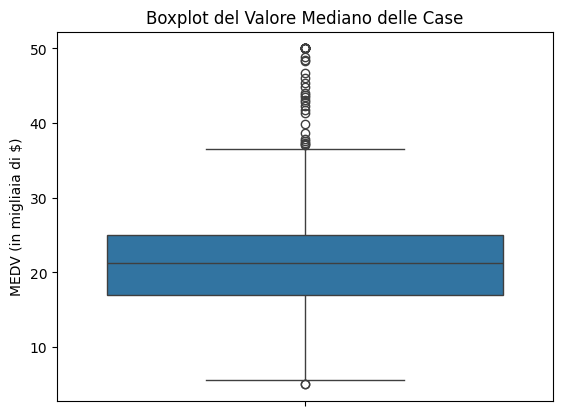

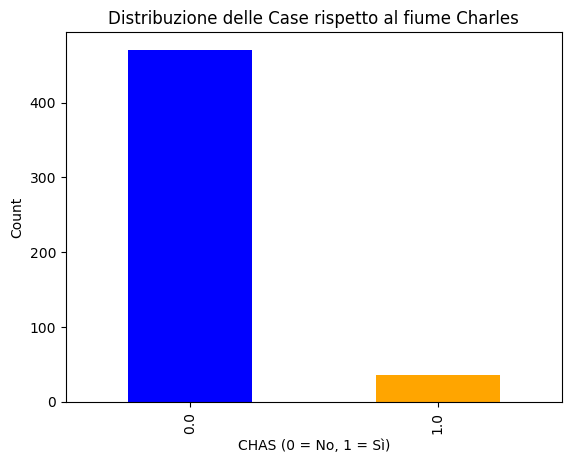

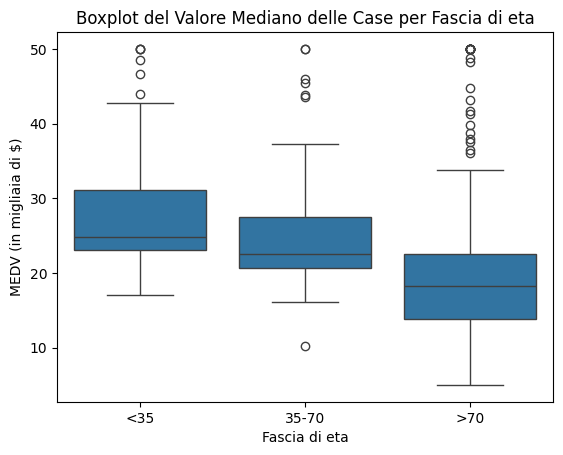

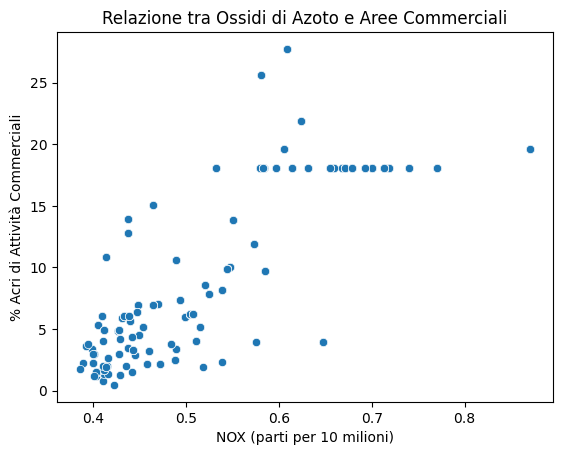

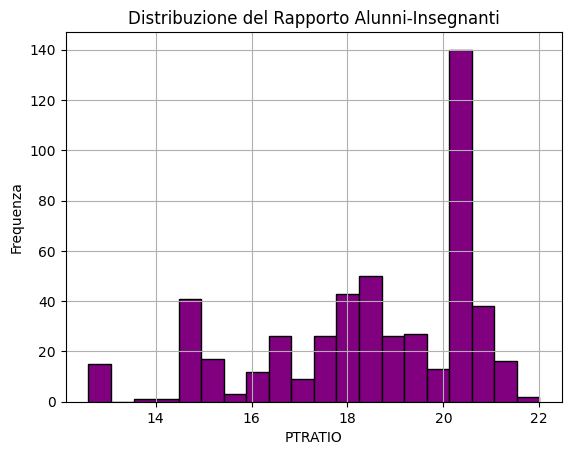

T-test: t=3.9964, p=0.0001
ANOVA: F=36.4076, p=0.0000
Correlazione Pearson NOX-INDUS: r=0.7637, p=0.0000
Regressione DIS-MEDV: slope=1.0916, intercept=18.3901, r=0.2499, p=0.0000


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = boston_df

# Boxplot per il valore mediano delle case
sns.boxplot(y=df['MEDV'])
plt.title('Boxplot del Valore Mediano delle Case')
plt.ylabel('MEDV (in migliaia di $)')
plt.show()

# Grafico a barre per la variabile CHAS (fiume Charles)
df['CHAS'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribuzione delle Case rispetto al fiume Charles')
plt.xlabel('CHAS (0 = No, 1 = Sì)')
plt.ylabel('Count')
plt.show()

# Boxplot di MEDV rispetto a AGE (suddiviso in gruppi)
df['AGE_Group'] = pd.cut(df['AGE'], bins=[0, 35, 70, 100], labels=['<35', '35-70', '>70'])
sns.boxplot(x='AGE_Group', y='MEDV', data=df)
plt.title('Boxplot del Valore Mediano delle Case per Fascia di eta')
plt.xlabel('Fascia di eta')
plt.ylabel('MEDV (in migliaia di $)')
plt.show()

# Scatter plot tra NOX e INDUS
sns.scatterplot(x=df['NOX'], y=df['INDUS'])
plt.title('Relazione tra Ossidi di Azoto e Aree Commerciali')
plt.xlabel('NOX (parti per 10 milioni)')
plt.ylabel('% Acri di Attività Commerciali')
plt.show()

# Istogramma del rapporto alunni-insegnanti
df['PTRATIO'].hist(bins=20, color='purple', edgecolor='black')
plt.title('Distribuzione del Rapporto Alunni-Insegnanti')
plt.xlabel('PTRATIO')
plt.ylabel('Frequenza')
plt.show()

# Test t per CHAS vs MEDV
group1 = df[df['CHAS'] == 1]['MEDV']
group0 = df[df['CHAS'] == 0]['MEDV']
t_stat, p_value = stats.ttest_ind(group1, group0)
print(f'T-test: t={t_stat:.4f}, p={p_value:.4f}')

# ANOVA per AGE vs MEDV
anova_stat, anova_p = stats.f_oneway(df[df['AGE_Group'] == '<35']['MEDV'],df[df['AGE_Group'] == '35-70']['MEDV'],df[df['AGE_Group'] == '>70']['MEDV'])
print(f'ANOVA: F={anova_stat:.4f}, p={anova_p:.4f}')

# Correlazione Pearson tra NOX e INDUS
corr, p_corr = stats.pearsonr(df['NOX'], df['INDUS'])
print(f'Correlazione Pearson NOX-INDUS: r={corr:.4f}, p={p_corr:.4f}')

# Regressione tra DIS e MEDV
slope, intercept, r_value, p_value, std_err = stats.linregress(df['DIS'], df['MEDV'])
print(f'Regressione DIS-MEDV: slope={slope:.4f}, intercept={intercept:.4f}, r={r_value:.4f}, p={p_value:.4f}')


In [7]:
#1. Il boxplot presenta  dei dati che sono considerati outliers, inoltre la mediana è esattamente al centro.
#2. Semplice conteggio di case sul e non il fiume
#3. 3 blox plot per il valore mediano de